# 12. 이미지 변형 (원근)

## 사다리꼴 이미지 펼치기

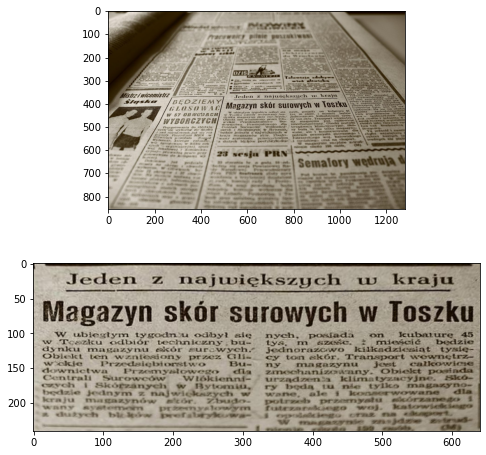

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('newspaper.jpg')

width, height = 640, 240 # 가로 크기 640, 세로 크기 240 으로 결과물 출력

src = np.array([[511, 352], [1008, 345], [1122, 584], [455, 594]], dtype=np.float32) # input 4개 지점
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # output 4개 지점
# 좌상, 우상, 우하, 좌하 (시계 방향으로 4 지점 정의)

matrix = cv2.getPerspectiveTransform(src, dst) # Matrix 얻어옴
result = cv2.warpPerspective(img, matrix, (width, height)) # matrix 데로 변환을 함

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

## 회전된 이미지 올바로 세우기

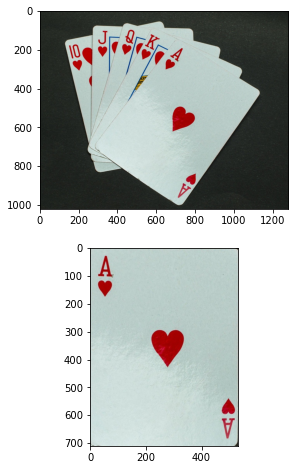

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('poker.jpg')

width, height = 530, 710 # 가로 크기 640, 세로 크기 240 으로 결과물 출력

src = np.array([[702, 143], [1133, 414], [726, 1007], [276, 700]], dtype=np.float32) # input 4개 지점
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # output 4개 지점
# 좌상, 우상, 우하, 좌하 (시계 방향으로 4 지점 정의)

matrix = cv2.getPerspectiveTransform(src, dst) # Matrix 얻어옴
result = cv2.warpPerspective(img, matrix, (width, height)) # matrix 대로 변환을 함

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

## 미니 프로젝트 : 반자동 문서 스캐너

### 마우스 이벤트 등록

In [9]:
import cv2

def mouse_handler(event, x, y, flags, parma):
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 Down
        print('왼쪽 버튼 Down')
        print(x, y)
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼  Up
        print('왼쪽 버튼 Up')
        print(x, y)
    elif event == cv2.EVENT_LBUTTONDBLCLK: # 마우스 왼쪽 버튼 더블클릭
        print('왼쪽 버튼 Double Click')
        # 마우스 더블클릭은 Down -> Up -> Double Click -> UP 4 가지가 같이 발생한다.
        
    elif event == cv2.EVENT_MOUSEMOVE: # 마우스 이동
#         print('마우스 이동')
        pass
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪾 버튼 Down
        print('오른쪽 버튼 Down')
    pass

img = cv2.imread('poker.jpg')
cv2.namedWindow('img') # img 란 이림의 윈도우를 먼저 만들어 두는 것/ 여기에 마수으 이벤트를 처리하기 위한 핸들러 적용
cv2.setMouseCallback('img', mouse_handler)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

왼쪽 버튼 Down
514 775
왼쪽 버튼 Up
515 775
오른쪽 버튼 Down
왼쪽 버튼 Down
678 590
왼쪽 버튼 Up
678 590
왼쪽 버튼 Double Click
왼쪽 버튼 Up
678 590
왼쪽 버튼 Down
284 696
왼쪽 버튼 Up
284 696
왼쪽 버튼 Down
500 701
왼쪽 버튼 Up
500 701
왼쪽 버튼 Down
580 654
왼쪽 버튼 Up
580 654


### 프로젝트

In [23]:
import cv2
import numpy as np

point_list = []
src_img = cv2.imread('poker.jpg')

COLOR = (255, 0, 255) # B G R -> 핑크
THICKNESS = 3 # 두께
drawing = False # 선을 그릴 지 여부

# mousemove는 따로 정의하지 않으면 계속 실행된다고 한다.
def mouse_handler(event, x, y, flags, parma):
    global drawing
    dst_img = src_img.copy()
    
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 Down
        drawing = True
        point_list.append((x, y))
    
    if drawing:
        prev_point = None # 직선의 시작점
        for point in point_list:
            cv2.circle(dst_img, point, 7, COLOR, cv2.FILLED)
            if prev_point:
                cv2.line(dst_img, prev_point, point, COLOR, THICKNESS, cv2.LINE_AA)
            prev_point = point
        
        next_point = (x, y)
        
        # 세 개의 점만 클릭하면 마지막은 사각형을 보여주자.
        if len(point_list) == 3:
            cv2.line(dst_img, next_point, point_list[0], COLOR, THICKNESS, cv2.LINE_AA)
        
        if len(point_list) == 4:
            show_result(point_list) # 결과 출력
            next_point = point_list[0] # 첫 번째 클릭한 지점
        cv2.line(dst_img, prev_point, next_point, COLOR, THICKNESS, cv2.LINE_AA)

    
    cv2.imshow('img', dst_img)

def show_result(point_list):
    width, height = 530, 710 # 가로 크기 640, 세로 크기 240 으로 결과물 출력

    src = np.float32(point_list)
    dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # output 4개 지점
    # 좌상, 우상, 우하, 좌하 (시계 방향으로 4 지점 정의)

    matrix = cv2.getPerspectiveTransform(src, dst) # Matrix 얻어옴
    result = cv2.warpPerspective(src_img, matrix, (width, height)) # matrix 대로 변환을 함
    cv2.imshow('result', result)
    
cv2.namedWindow('img') # img 란 이림의 윈도우를 먼저 만들어 두는 것/ 여기에 마수으 이벤트를 처리하기 위한 핸들러 적용
cv2.setMouseCallback('img', mouse_handler)
cv2.imshow('img', src_img)
cv2.waitKey(0)
cv2.destroyAllWindows()